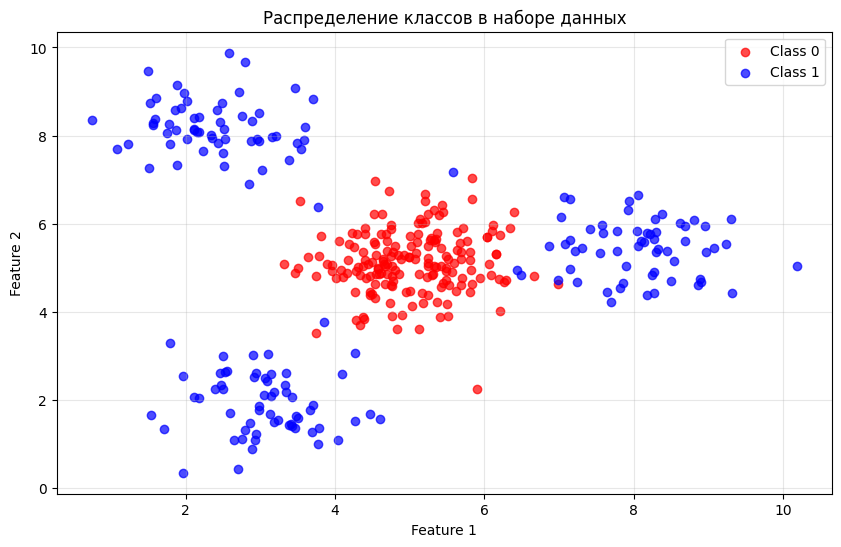

Размер данных: (360, 2)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns


data = np.loadtxt('data_decision_trees.txt', delimiter=',')
X = data[:, :2]
Y = data[:, 2]

# Визуализация распределения классов
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red', alpha=0.7, label='Class 0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Распределение классов в наборе данных')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


print(f"Размер данных: {X.shape}")


In [ ]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Обучение базовой модели Random Forest
rf = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=4, min_samples_split = 2, min_samples_leaf = 5)
rf.fit(X_train, y_train)

# Предсказания
y_pred = rf.predict(X_test)

# Метрики для базовой модели
print("Базовые метрики Random Forest:")
print(classification_report(y_test, y_pred))

Тренировочная выборка: (252, 2)
Тестовая выборка: (108, 2)
Базовые метрики Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94        54
         1.0       0.94      0.93      0.93        54

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



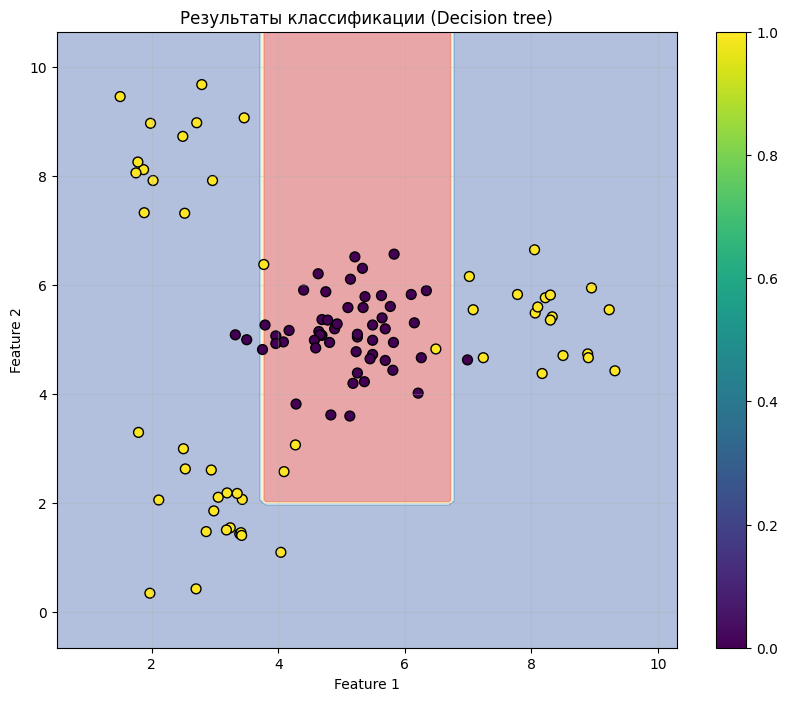

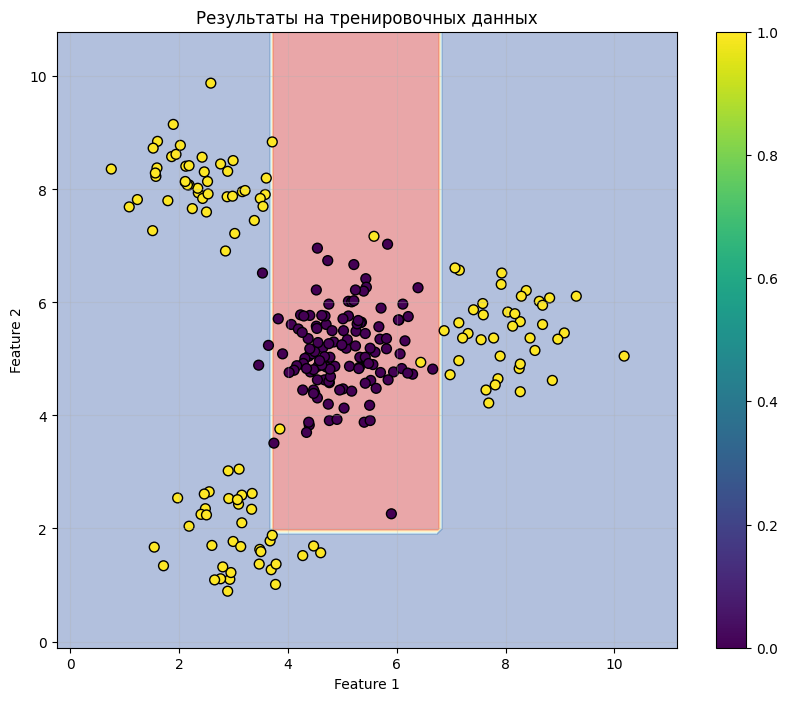

In [ ]:
def visualize_classifier(model, X, y, title="Классификация"):
    """
    Функция для визуализации результатов классификации
    """
    # Определение границ графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создание сетки для построения контуров
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Предсказание для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Создание графика
    plt.figure(figsize=(10, 8))

    # Отображение областей решений
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    # Отображение точек данных
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50,
                          edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.grid(alpha=0.3)
    plt.show()

# Визуализация для лучшей модели
visualize_classifier(rf, X_test, y_test,
                     title="Результаты классификации (Decision tree)")

# Визуализация для тренировочных данных
visualize_classifier(rf, X_train, y_train,
                     title="Результаты на тренировочных данных")



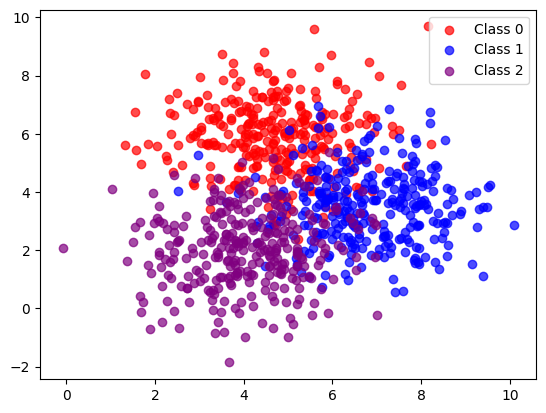

In [ ]:
data = np.loadtxt('data_random_forests.txt', delimiter = ',')
X = data[:, :2]
Y = data[:, 2]

plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color = 'red', alpha=0.7, label='Class 0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color = 'blue', alpha=0.7, label='Class 1')
plt.scatter(X[Y==2][:,0], X[Y==2][:,1], color = 'purple', alpha=0.7, label='Class 2')
plt.legend()
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Обучение базовой модели Random Forest
rf = RandomForestClassifier(criterion = 'gini', n_estimators=100 , random_state=42, max_depth=2)
rf.fit(x_train, y_train)

# Предсказания
y_pred = rf.predict(x_test)

# Метрики для базовой модели
print("Базовые метрики Random Forest:")
print(classification_report(y_test, y_pred))

Тренировочная выборка: (252, 2)
Тестовая выборка: (108, 2)
Базовые метрики Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        90
         1.0       0.84      0.83      0.84        90
         2.0       0.83      0.88      0.85        90

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



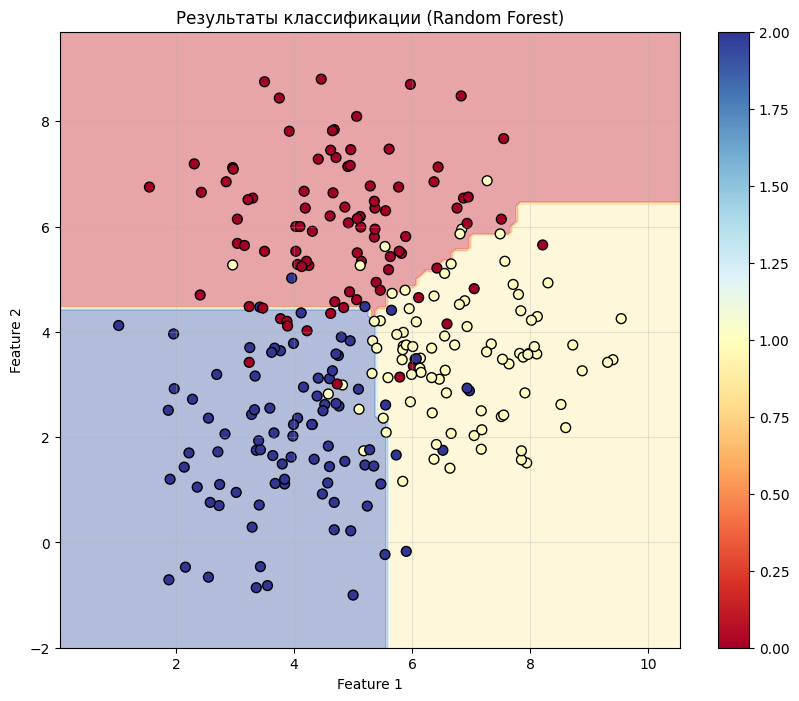

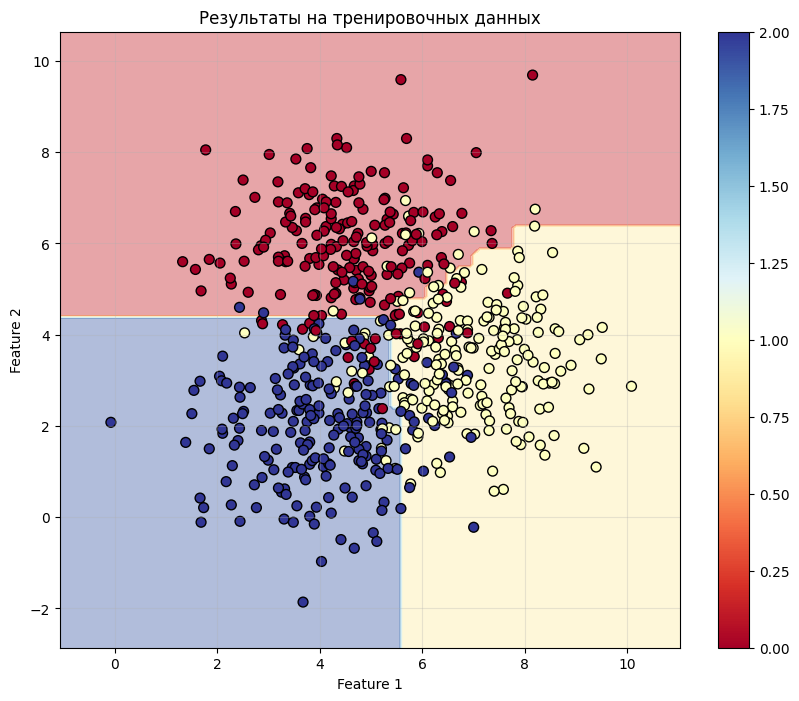

In [ ]:
def visualize_classifier(model, X, y, title="Классификация"):
    """
    Функция для визуализации результатов классификации
    """
    # Определение границ графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создание сетки для построения контуров
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Предсказание для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Создание графика
    plt.figure(figsize=(10, 8))

    # Отображение областей решен
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    # Отображение точек данных
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50,
                          edgecolors='k', cmap=plt.cm.RdYlBu)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.grid(alpha=0.3)
    plt.show()

# Визуализация для лучшей модели
visualize_classifier(rf, x_test, y_test,
                     title="Результаты классификации (Random Forest)")

# Визуализация для тренировочных данных
visualize_classifier(rf, x_train, y_train,
                     title="Результаты на тренировочных данных")

Базовые метрики Random Forest:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86        90
         1.0       0.85      0.81      0.83        90
         2.0       0.85      0.90      0.88        90

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



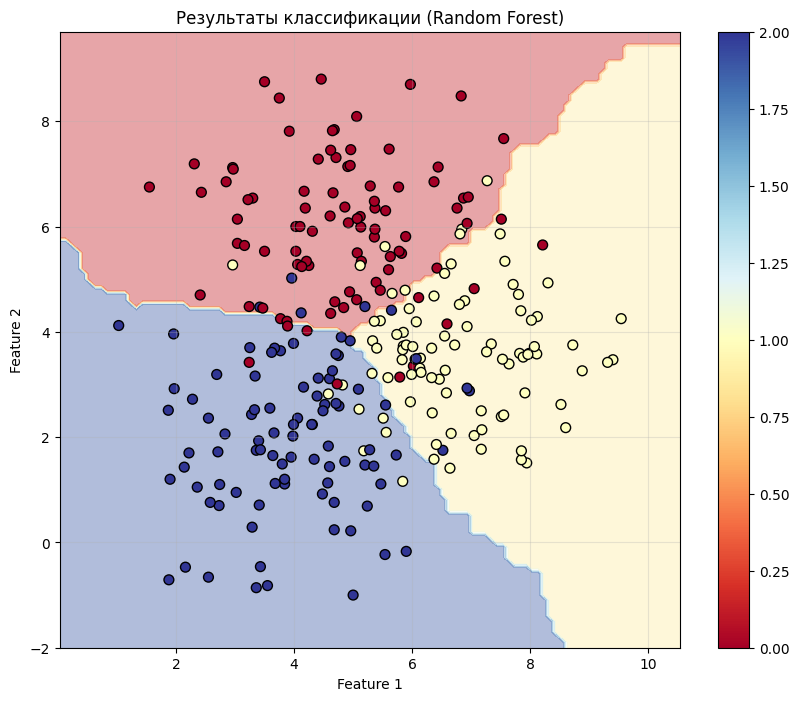

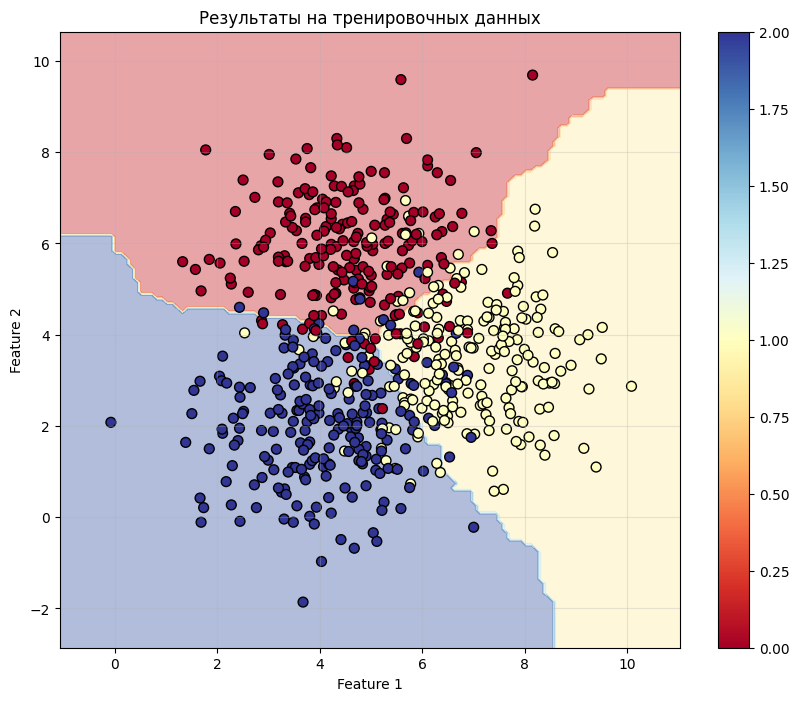

In [ ]:
# Обучение базовой модели Random Forest
rf = ExtraTreesClassifier(criterion = 'gini', n_estimators=100 , random_state=42, max_depth=3)
rf.fit(x_train, y_train)

# Предсказания
y_pred = rf.predict(x_test)

# Метрики для базовой модели
print("Базовые метрики Random Forest:")
print(classification_report(y_test, y_pred))
# Визуализация для лучшей модели
visualize_classifier(rf, x_test, y_test,
                     title="Результаты классификации (Random Forest)")

# Визуализация для тренировочных данных
visualize_classifier(rf, x_train, y_train,
                     title="Результаты на тренировочных данных")

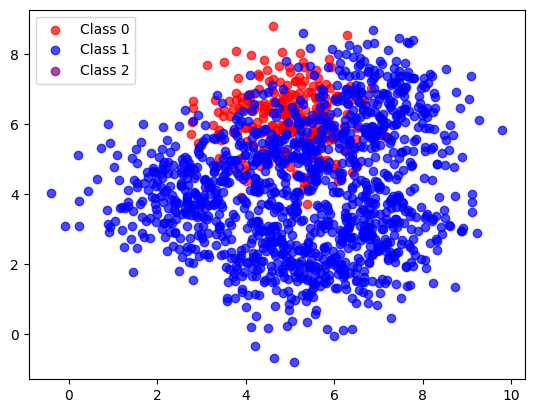

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('data_imbalance.txt', delimiter = ',')
X = data[:, :2]
Y = data[:, 2]

plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color = 'red', alpha=0.7, label='Class 0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color = 'blue', alpha=0.7, label='Class 1')
plt.scatter(X[Y==2][:,0], X[Y==2][:,1], color = 'purple', alpha=0.7, label='Class 2')
plt.legend()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Обучение базовой модели Random Forest
rf = ExtraTreesClassifier(criterion = 'gini', n_estimators=100 , random_state=42, max_depth=2)
rf.fit(x_train, y_train)

# Предсказания
y_pred = rf.predict(x_test)

# Метрики для базовой модели
print("Базовые метрики Random Forest:")
print(classification_report(y_test, y_pred))

Тренировочная выборка: (252, 2)
Тестовая выборка: (108, 2)
Базовые метрики Random Forest:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        75
         1.0       0.83      1.00      0.91       375

    accuracy                           0.83       450
   macro avg       0.42      0.50      0.45       450
weighted avg       0.69      0.83      0.76       450



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Обучение базовой модели Random Forest
rf = ExtraTreesClassifier(criterion = 'gini', n_estimators=100 , random_state=42, max_depth=23, class_weight='balanced')
rf.fit(x_train, y_train)

# Предсказания
y_pred = rf.predict(x_test)

# Метрики для базовой модели
print("Базовые метрики Random Forest:")
print(classification_report(y_test, y_pred))

Тренировочная выборка: (252, 2)
Тестовая выборка: (108, 2)
Базовые метрики Random Forest:
              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57        75
         1.0       0.91      0.93      0.92       375

    accuracy                           0.86       450
   macro avg       0.76      0.73      0.74       450
weighted avg       0.86      0.86      0.86       450



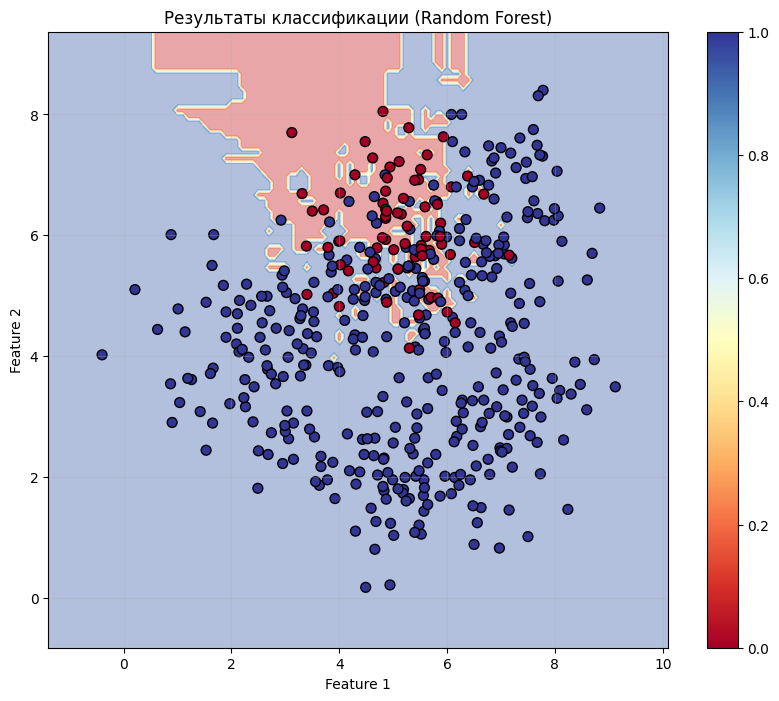

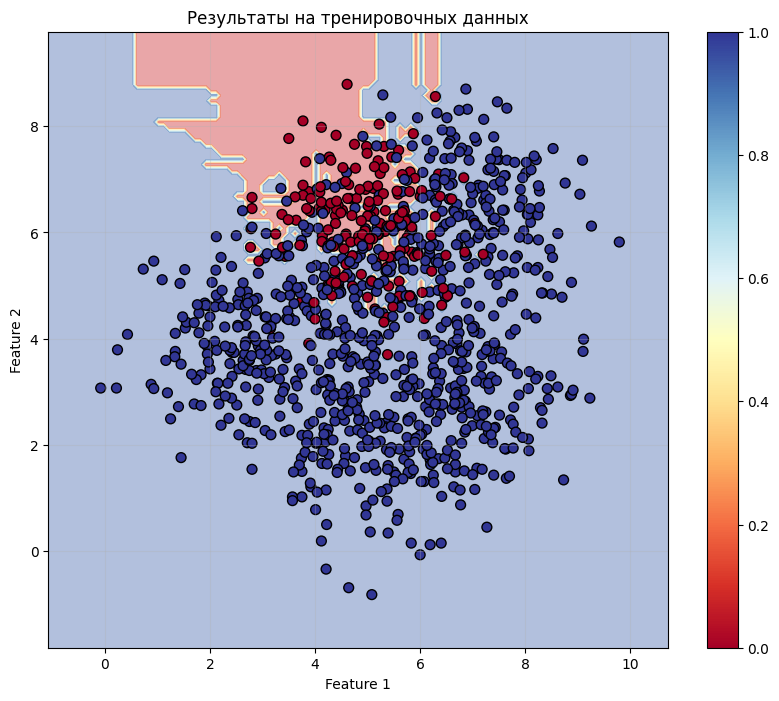

In [ ]:
# Визуализация для лучшей модели
visualize_classifier(rf, x_test, y_test,
                     title="Результаты классификации (Random Forest)")

# Визуализация для тренировочных данных
visualize_classifier(rf, x_train, y_train,
                     title="Результаты на тренировочных данных")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


data = np.loadtxt('data_random_forests.txt', delimiter = ',')
X = data[:, :2]
Y = data[:, 2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Определение параметров и их значений для перебора
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели и настройка с использованием решетчатого поиска
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
Best Cross-Validation Score: 0.8380952380952381


In [ ]:
rf_model.fit(x_train, y_train)
# Предсказания
y_pred = rf_model.predict(x_test)
# Метрики для базовой модели
print("Базовые метрики Random Forest:")
print(classification_report(y_test, y_pred))

Базовые метрики Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        90
         1.0       0.82      0.77      0.79        90
         2.0       0.81      0.81      0.81        90

    accuracy                           0.82       270
   macro avg       0.82      0.82      0.82       270
weighted avg       0.82      0.82      0.82       270

